In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

dataset = pd.read_csv("../input/train_V2.csv")
dataset.head() 






['train_V2.csv', 'test_V2.csv', 'sample_submission_V2.csv']


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [32]:
dataset.shape

(4446966, 29)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [34]:
dataset.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [35]:
dataset.dropna(inplace=True)

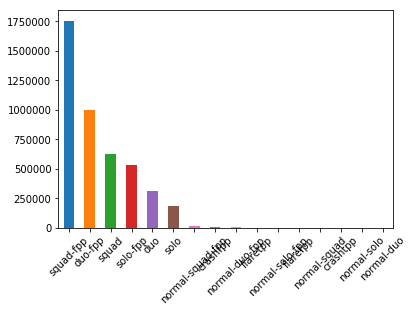

In [36]:
dataset.matchType.value_counts().plot(kind='bar', rot=45) 
plt.show()

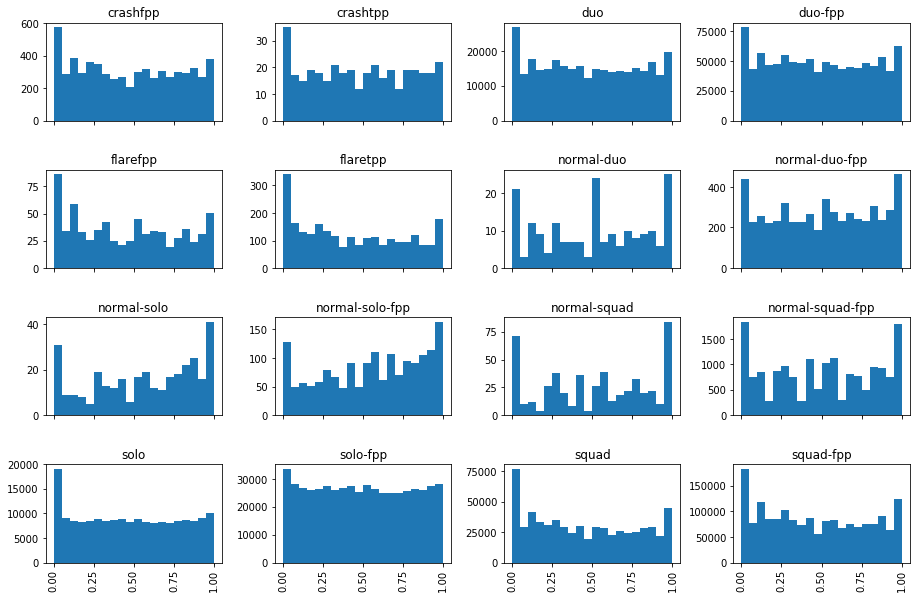

In [37]:
dataset[['winPlacePerc']].hist(by=dataset.matchType, figsize=(15,10), sharex=True, bins=20)
plt.show()

In [ ]:
# распределение типов матчей по целевой переменной конечно не одинакое, но есть схожие черты - короче, удалим этот признак \(с преобразованием его в бинарный уже проверяла качество в прошлом сабмите, но ноутбук не скачивала)

In [38]:
dataset.drop('matchType', axis=1, inplace=True)

In [39]:
dataset.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [40]:
from numpy.linalg import matrix_rank

In [41]:
matrix = dataset.drop([x for x in dataset.columns if 'Id' in x] + ['winPlacePerc'], axis=1)
matrix_rank(matrix.values)

24

In [42]:
len(matrix.columns)

24

In [43]:
cols = dataset.columns.tolist()[3:]
cols 

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

In [44]:
corr_mat = dataset[cols].corr()

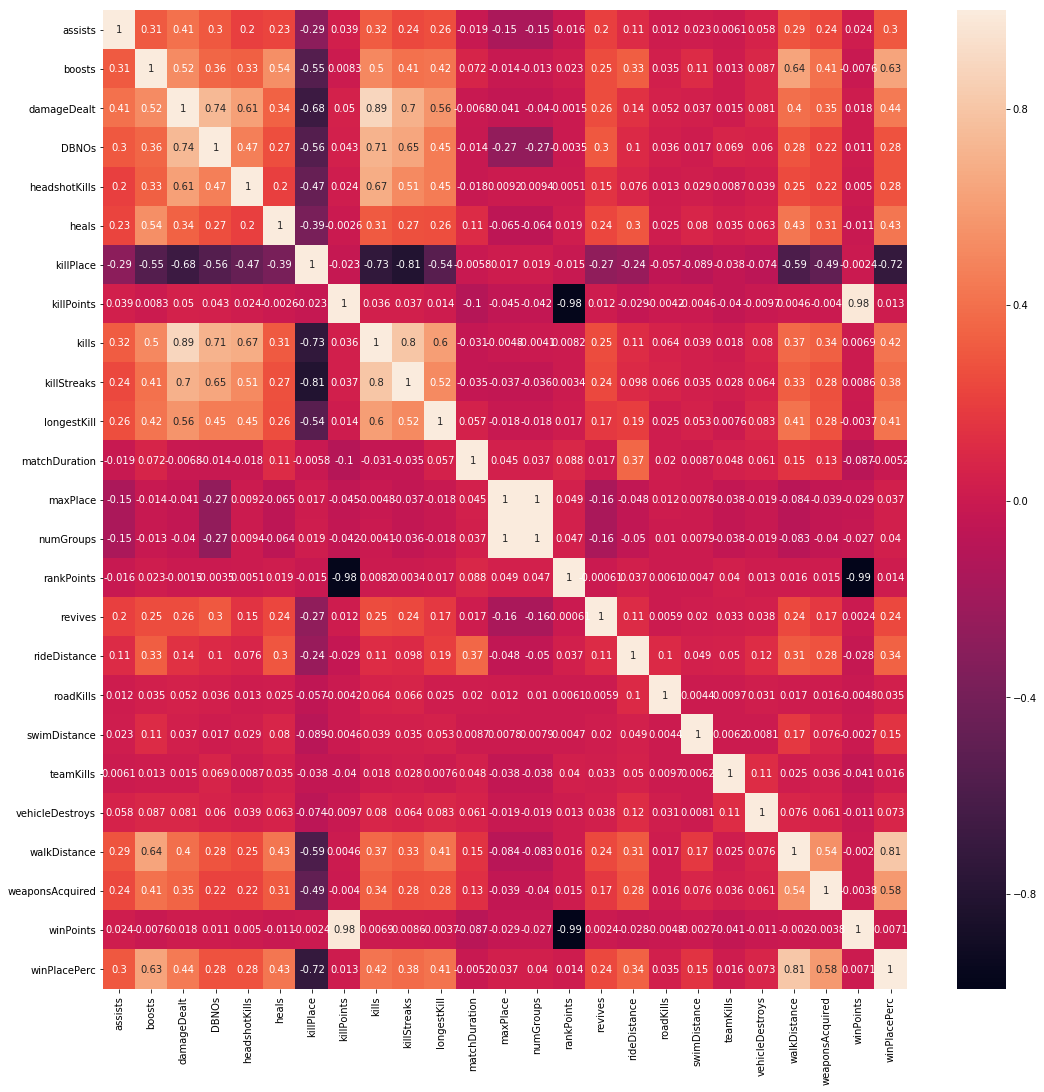

In [45]:
plt.figure(figsize=(18,18))
sns.heatmap(corr_mat, annot=True)

plt.show()

In [ ]:
# удалим признаки, которые сильно коррелируют между собой
# в принципе, они все входят в damageDealt, его оставим
dataset.drop(['DBNOs', 
              'assists', 
              'headshotKills', 
              'killStreaks', 
              'kills', 
              'longestKill', 
              'numGroups', # возможно не нужен, т.к. есть maxPlace
              'rankPoints', 
              'winPoints'], axis=1, inplace=True)

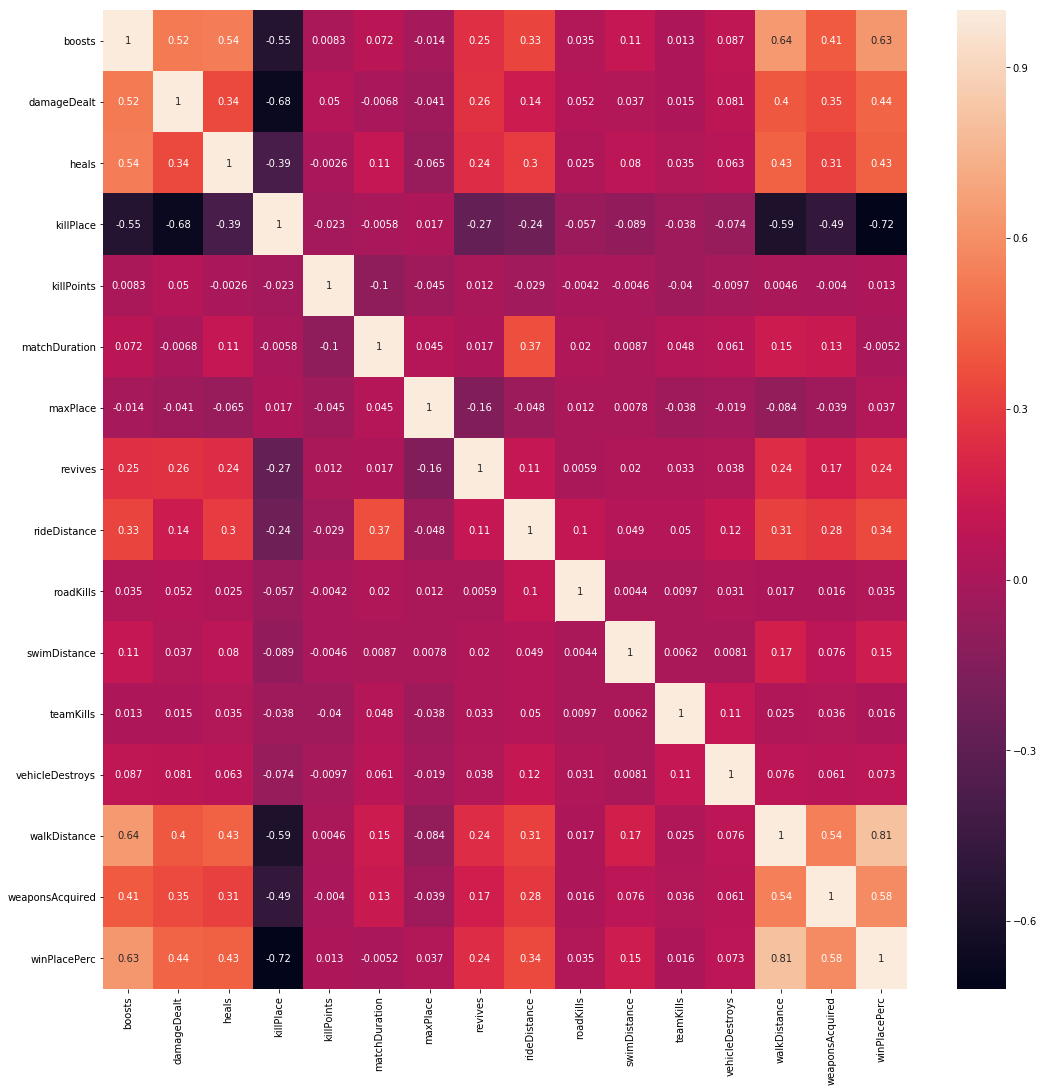

In [47]:
cols = dataset.columns.tolist()[3:]
corr_mat = dataset[cols].corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [48]:
# также удалим другие коллериующие признаки, которые оказывают меньшее влияние на целевую переменную
dataset.drop(['killPlace', 'weaponsAcquired', 'heals'], axis=1, inplace=True)

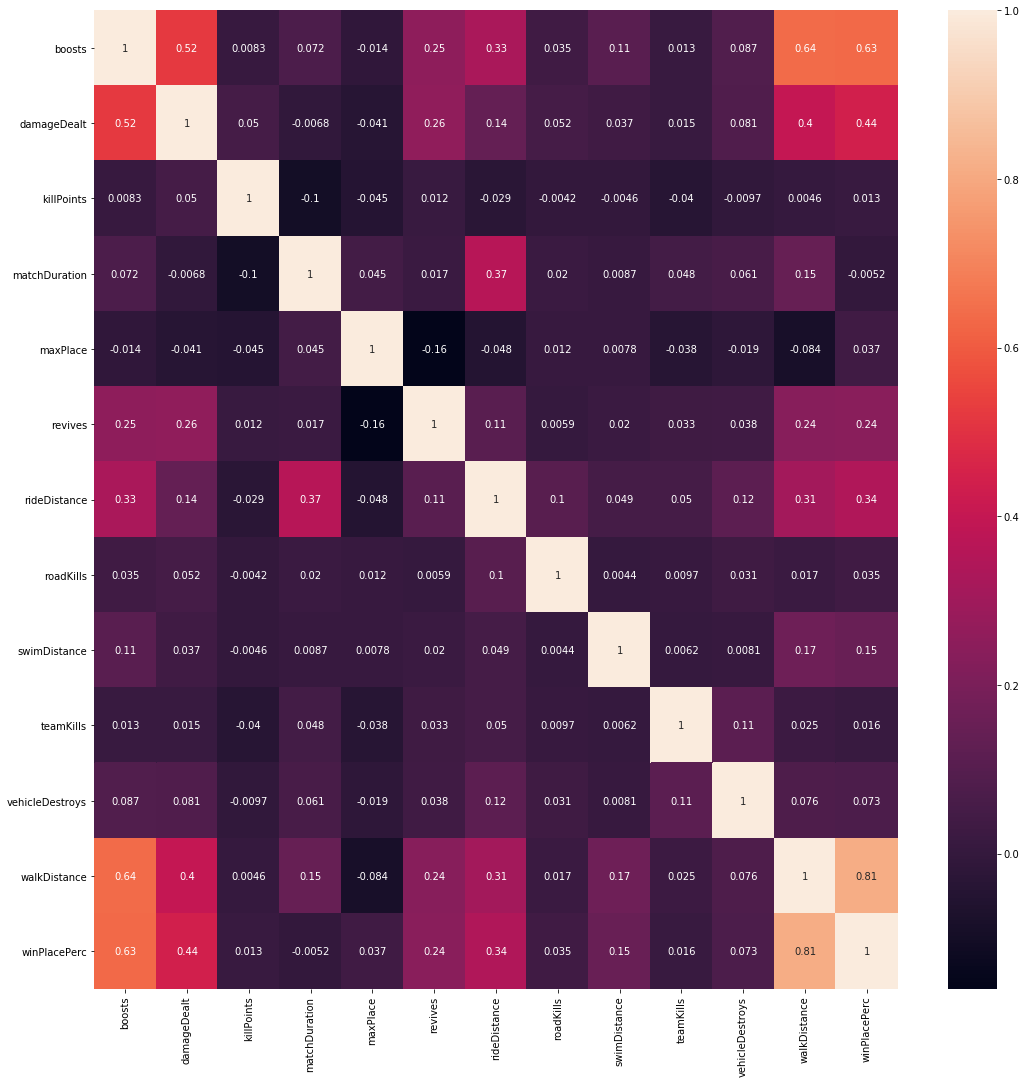

In [49]:
cols = dataset.columns.tolist()[3:]
corr_mat = dataset[cols].corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn import metrics

In [52]:
data_train, data_test = train_test_split(dataset.drop([x for x in dataset.columns if 'Id' in x], axis=1))
y_train = data_train['winPlacePerc']
y_test = data_test['winPlacePerc']
data_train = data_train.drop('winPlacePerc', axis = 1) 
data_test = data_test.drop('winPlacePerc', axis = 1)
#dtrain = xgb.DMatrix(data_train, label=y_train)
#dtest = xgb.DMatrix(data_test, label=y_test)

In [53]:
import lightgbm as lbm

In [54]:
%%time
# параметры подбирала следуя документации 
model = lbm.LGBMRegressor(n_estimators=200, max_depth=7, num_leaves=128, min_data_in_leaf=1000, learning_rate=0.1)
model.fit(data_train, y_train)

CPU times: user 2min 15s, sys: 1.19 s, total: 2min 16s
Wall time: 35.6 s


In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(model, 'lgbm_model.joblib')

['lgbm_model.joblib']

In [57]:
preds = model.predict(data_test)

In [58]:
print(metrics.mean_absolute_error(y_test, preds))

0.09243127668331477


In [59]:
test = pd.read_csv('../input/test_V2.csv')

In [60]:
test.drop('matchType', axis=1, inplace=True)

In [61]:
test.drop(['DBNOs', 'assists', 'headshotKills', 'killStreaks', 'kills', 'longestKill', 'numGroups', 'rankPoints', 'winPoints', 'killPlace', 'weaponsAcquired', 'heals'], axis=1, inplace=True)

In [62]:
test_data = test.drop([x for x in dataset.columns if 'Id' in x], axis=1)

In [63]:
preds = model.predict(test_data)

In [ ]:
my_submission = pd.DataFrame({'Id': test.Id, 'winPlacePerc': preds})
my_submission.to_csv('submission.csv', index=False)